<a href="https://colab.research.google.com/github/GUC-DM/w24-mini-project-2-maryam-elgharraz-t7-sara-elesaily-t7/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Maryam Elgharraz

ID: 55-21792

Tutorial: T7

---

Name: Sara Elesaily

ID: 55-26365

Tutorial: T7

---

Name: Mariam Soliman

ID: 55-10352

Tutorial: T7

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8") # Changed from 'seaborn' to 'seaborn-v0_8'

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')
pd.set_option('display.max_columns', None)

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check       $29.85/m       $29.85   
1               No               Mailed check       $56.95/m      $1889.5   
2              Yes               Mailed check       $53.85/m      $108.15   
3               No  Bank transfer (automatic)        $42.3/m     $1840.75   
4              Yes           Electronic check        $70.7/m      $151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

-- Monthly charges and total charges has dollar sign and "/m" in them

## Data Inspection

In [2]:
#Inspecting the data to know the number of non-null values and the attribute's data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

-- It is observed that customer ID and total charges has null values
-- Monthly charges and total charges are of type object

In [3]:
df['customerID'].unique()


array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [4]:
# null_rows = df[df['customerID'].isna()]
# print(null_rows)

In [5]:
# null_rows = df[df['TotalCharges'].isna()]
# print(null_rows)

In [6]:
# sns.boxplot(x=df['TotalCharges'])
# plt.show()

In [7]:
#display total charges unique values
df['TotalCharges'].unique()

array(['$29.85', '$1889.5', '$108.15', ..., '$346.45', '$306.6',
       '$6844.5'], dtype=object)

In [8]:
#Checking for the missing values in total charges in each row
df['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7027    False
7028    False
7029    False
7030    False
7031    False
Name: TotalCharges, Length: 7032, dtype: bool

In [9]:
#checking total charges data type
print(df['TotalCharges'].dtype) #before


object


In [10]:
#checking monthly charges data type
print(df['MonthlyCharges'].dtype) #before

object


In [11]:
df.describe()

SeniorCitizen       tenure
count    7032.000000  7032.000000
mean        0.162400    32.421786
std         0.368844    24.545260
min         0.000000     1.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

In [12]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

SeniorCitizen  tenure
count        7032.00 7032.00
mean            0.16   32.42
std             0.37   24.55
min             0.00    1.00
25%             0.00    9.00
50%             0.00   29.00
75%             0.00   55.00
max             1.00   72.00

In [13]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

-- Total charges has 852 null value while Customer ID has 56 null value

In [14]:
#Here we are displaying each attribues unique values
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

We decided not to drop the "No phone service" and the "No internet service" values that were repeated in several attributes as we beleive it has a meaning and that we need them.For example , in the multiple lines attributes , there is a difference between a user who have one bas has "NO multiple lines" and a user who actually has "NO" internet service.Each has a meaning and a value it shows,dropping any would result in data loss.

This applies to all columns with the same idea.

In [15]:
#While here we are displaying the total number of unique values in each attribute
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [16]:
#Here we are just displaying the categorical attribute's unique values
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


In [17]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check       $29.85/m       $29.85   
1               No               Mailed check       $56.95/m      $1889.5   
2              Yes               Mailed check       $53.85/m      $108.15   
3               No  Bank transfer (automatic)        $42.3/m     $1840.75   
4              Yes           Electronic check        $70.7/m      $151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## Data Cleaning

In [18]:
#We will drop customer ID since it has 6976 unique value while the data set already have 7032 row
#This will make the model overfitted and it will not be generalizable
#Also, the customer id has no corelation with any of the depenedant variables as it just defines the customer so it won't affect the dependant variable as it does not add any useful information to our data
#We will not impute the missing/null customer id since it is going to be dropped

#Accordingly we will drop the customer id column
df.drop('customerID', axis=1, inplace=True)


In [19]:

print(df['MonthlyCharges'].dtype) #data type of monthly charges before cleaning


df['MonthlyCharges'] = df['MonthlyCharges'].str.extract('([0-9,.]+)', expand=False) #removing the "$" and "/m"

df['MonthlyCharges'] = df['MonthlyCharges'].astype(float) # Converting it to float

print(df['MonthlyCharges'].dtype) #data type after cleaning

df.head() #we can see how it looks like in the data frame (output)

object
float64


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85       $29.85   
1               No               Mailed check           56.95      $1889.5   
2              Yes               Mailed check           53.85      $108.15   
3               No  Bank transfer (automatic)           42.30     $1840.75   
4              Yes           Electronic check           70.70      $151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [20]:
print(df['TotalCharges'].dtype) #data type of total charges before cleaning

df['TotalCharges'] = df['TotalCharges'].str.extract('([0-9,.]+)', expand=False) #removing the "$"

df['TotalCharges'] = df['TotalCharges'].astype(float) # Converting it to float

print(df['TotalCharges'].dtype) #data type after cleaning

df.head() #we can see how it looks like in the data frame (output)


object
float64


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

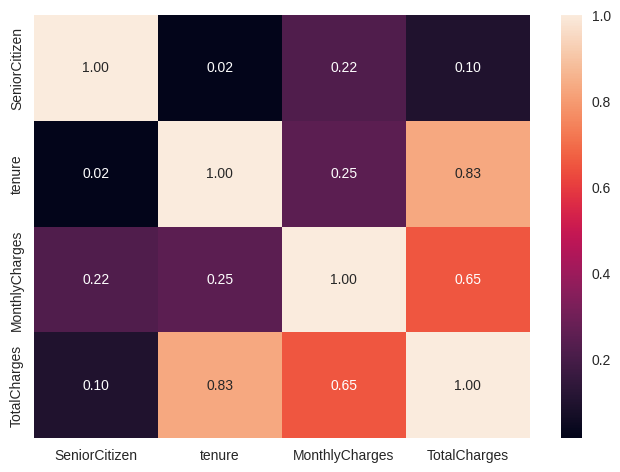

In [21]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [22]:
#We had null values in the total charges attributes so we need to impute them
#According to the dataset explanation provided above , we can conclude that total charges attribute can be derived from the "tenure" and "monthly charges"
#tenure is the number of months the customer has stayed within the company while monthly charges is the amount the customer pays monthly.
#Total charges is the total amount the customer paid throught the whole time he stayed with the company.
#Also, there is a high correlation between total charges and tenure and total charges and monthly charges showing that they are actually corelated which is 0.8 and 0.6 respectively.

#So we can say total charges is the product of tenure and monthly charges and that's how we imputed the total charge's missing values/null
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)



<ipython-input-22-9ecabbba8789>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)


In [23]:
#making sure all nulls are imputed
print(df['TotalCharges'].isnull().sum())

0


-- After imputing the total charges null values, we considered dropping the total charges attribute for two reasons:


1.   The first is that there is a high corelation between it and the other two attributes which are tenure (0.83) and monthly charges (0.65) which may lead to inaccurate model evalaution as the "independent" variables should be independant.

2.   The second is that since the column could be derived then keeping it in the data may sound redundant

Dropping , tenure or monthly charges was not an option as this will lead to data loss so we just considered dropping total charges.

In addition, after some research we found that the high corelation does not have a huge negative impact on descsion trees but it is preffered to avoid it.Also, for logistic regression for example , the high corelation between independant varibales negatively impacts the model.

Accordingly, we have decided to drop total charges attribute in the feature selection part.





In [24]:
# df.drop('TotalCharges', axis=1, inplace=True)


In [25]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here we can see that there are no null values

In [26]:
#Displaying eaah categorical column values
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


We observed that "Contract" looks like an ordinal attribute meaning that we can consider dealing with its values as different categories where there is a ranking/order between them

In [27]:
#First we converted the contract column to be of a categorical data type
#Then each unique value was counted as a distinct category
#There is a logical order among the contract values as montn is less than a year which is less than a two year contract making it "ordinal" as we can "rank" them
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
# categorical_col.remove('Contract')
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [28]:
#As we can see , we can now apply binary operations on the Contract attribute as it now considered ordinal
#Here we tried to check for contracts that lasts for more than 2 years but there was not any as we only have till 2 years in our data
df[df['Contract'] > 'Two year']

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [29]:
#here we tested for the contracts that lasted for less than 2 years
df[df['Contract'] < 'Two year']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7025  Female              0      No         No      12           No   
7027    Male              0     Yes        Yes      24          Yes   
7028  Female              0     Yes        Yes      72          Yes   
7029  Female              0     Yes        Yes      11           No   
7030    Male              1     Yes         No       4          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7025  No phone service             DSL             No          Yes   
7027               Yes             DSL            Yes           No   
7028               Yes     Fiber optic             No          Yes   
7029  No phone service             DSL            Yes           No   
7030               Yes     Fiber optic             No           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7025              Yes         Yes         Yes             Yes        One year   
7027              Yes         Yes         Yes             Yes        One year   
7028              Yes          No         Yes             Yes        One year   
7029               No          No          No              No  Month-to-month   
7030               No          No          No              No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7025               No           Electronic check           60.65   
7027              Yes               Mailed check           84.80   
7028              Yes    Credit card (automatic)          103.20   
7029              Yes           Electronic check           29.60   
7030              Yes               Mailed check           74.40   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7025        743.30    No  
7027       1990.50    No  
7028       7362.90    No  
7029        346.45    No  
7030        306.60   Yes  

[5347 rows x 20 columns]

In [30]:
#Since churn attribute is our "Target" and it has only two unique values (binary)
#First we converetd it into categorical type
#Then ".cat.codes" was used to convert it its numerical equivelent
#NO is displayed as 0 and Yes is displayed as 1
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [31]:
#Here we are checking for the customers who churned and the customer who did not
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

There are 5163 customers who stayed and 1869 who churned.

In [32]:
#Here we can see each class percenatge
df['Churn'].value_counts() / df['Churn'].count()

Churn
0   0.73
1   0.27
Name: count, dtype: float64

It is observed that there is a class imbalance as almost 73% of customers stayed while only 27% has churned so they are not represnted equally.

In [33]:
#here we created a copy of the categorical columns list we have created above as we want to make some changes to it but without changing the original one
#In the copied categorical feautures , we removed the churn attribute as it is the target that we will actually need to predict so we don't want to include it in the model training
#So we will use the categorical features in our explaratory part while the copy will be used in the model training and evaluation
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

In [34]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

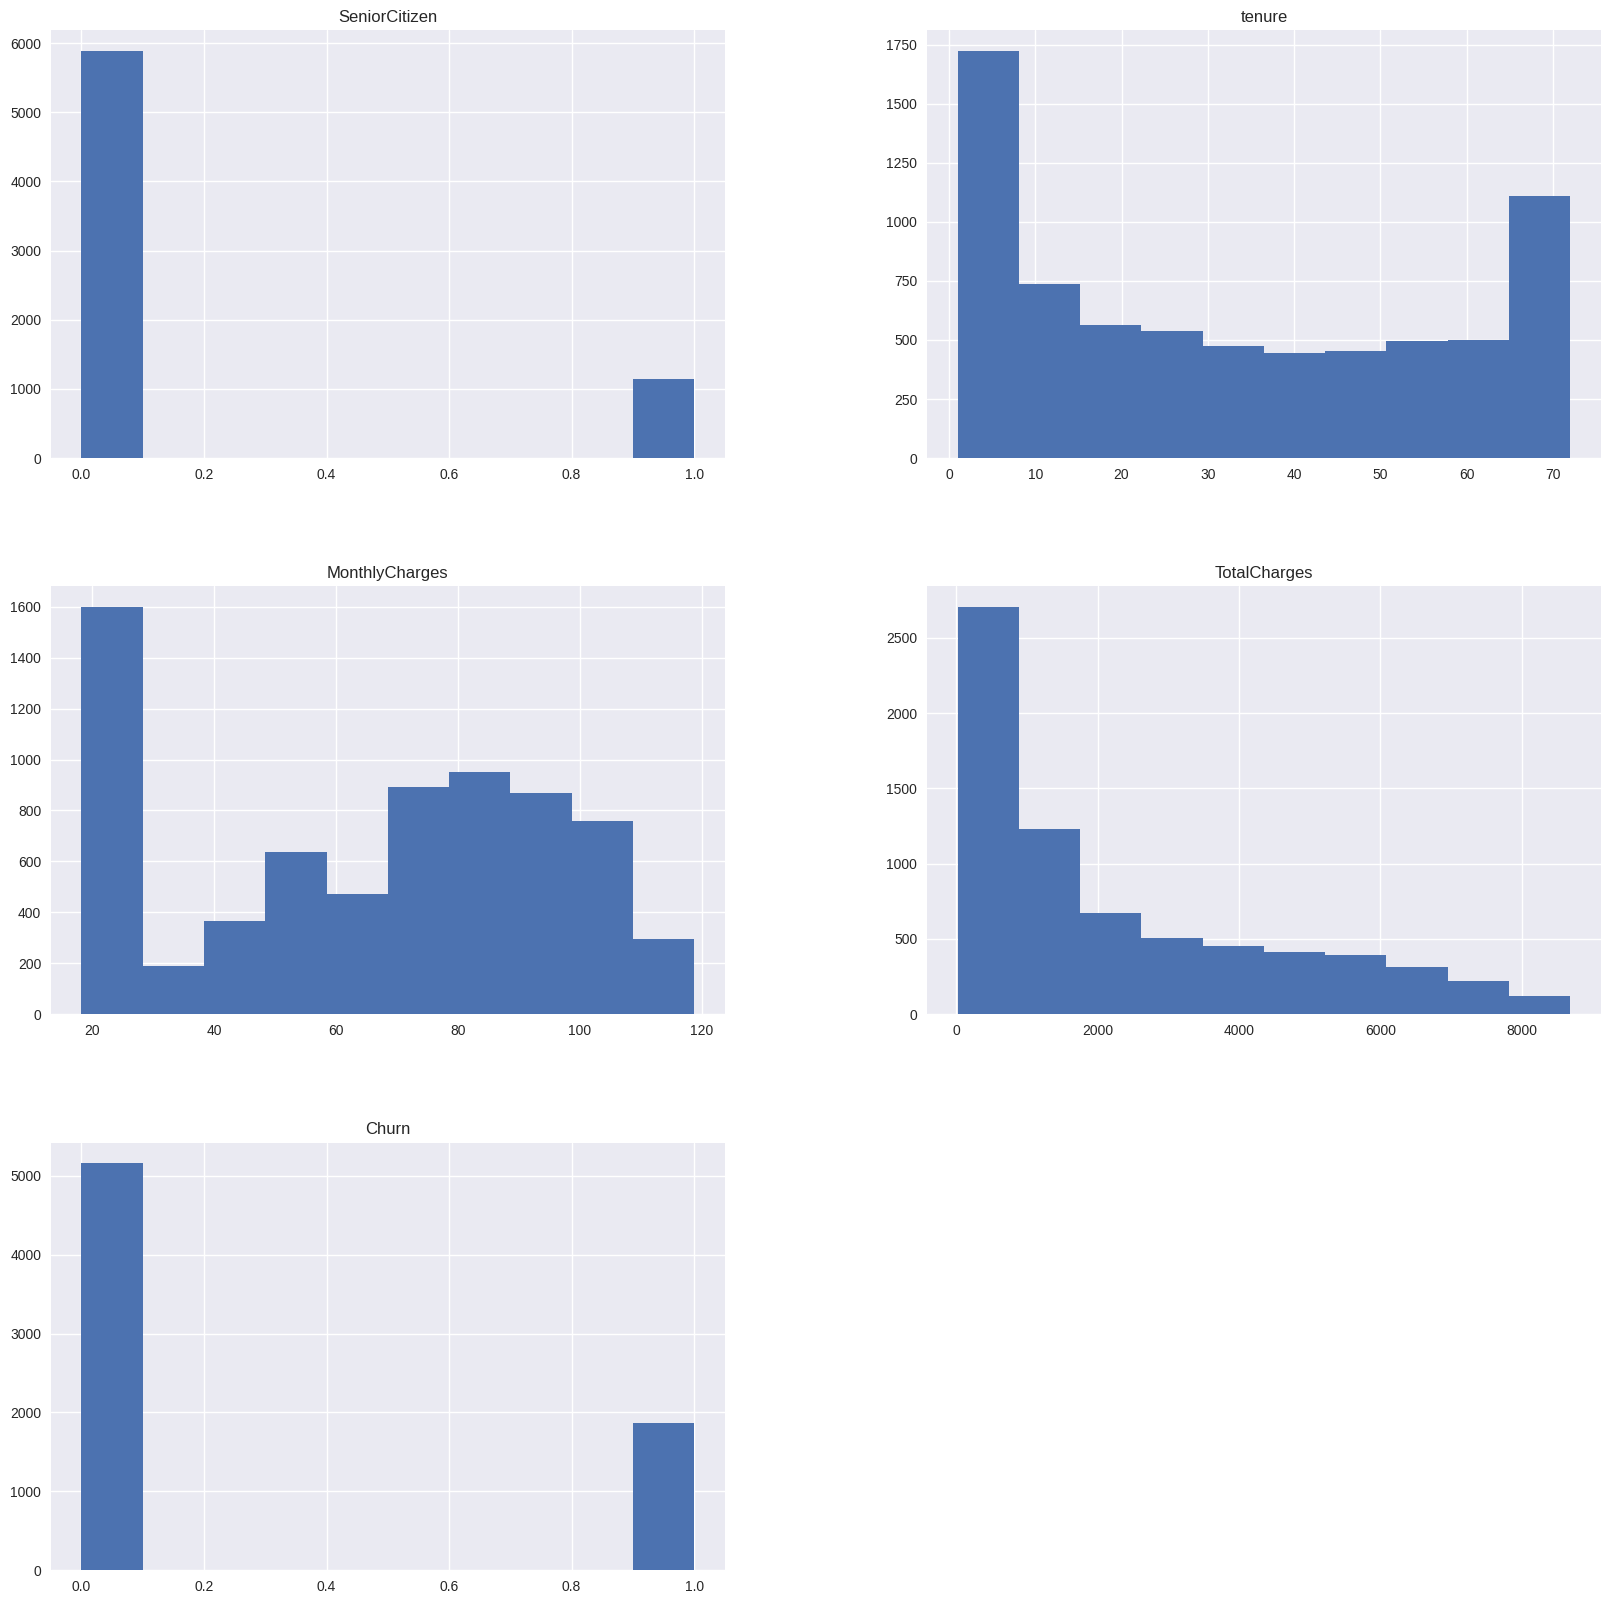

In [35]:
df.hist(figsize=(20, 20));

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

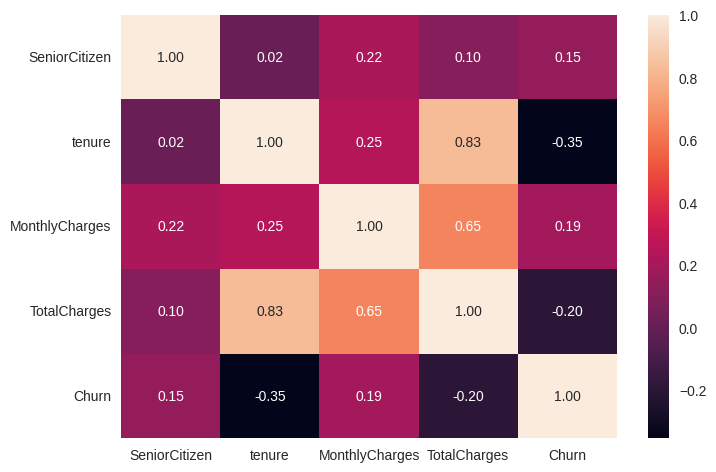

In [36]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

**Question 1 Answer / Part 1**

Here we used a heatmap to investigate the corelation between Churn and the numerical attributes.
We observed the following:

The corelation values range fron -1 to 0 , -1 means that the two values are perfectly negatively corelated meaning that if the independet variable increases then the dependant variable possibilty decreases.If it is a 0 then it means there is no corelation between the two attributes. And if it is a 1 then it means it perfectly positively corelated meaning than if a value increases the other increases too.

*   The corelation between churn and Monthly charges is 0.19 is a positive correlation however it is very low (slight) which indicates that there is a very weak correlation between them meaning the highest the monthly charger the more likely customer will churn.

*   The corelation between churn and Tenure is -0.35 which is a negative ccorelation meaning that whenever the tenure decreases the churn increases and vice versa bur still it is not that strong so it is considered as a moderate correlation in terms of strength.The longer the months spent, the less likely the customer will churn.

*   The corelation between churn and Senior Citizen is 0.15 is a positive correlation however it is very low which indicates that there is a very weak correlation between them.

*  The corelation between churn and Total Charges is -0.2 which is a weak neagtive correlation between both of them





<ipython-input-37-1b23e553ac81>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=column, y='Churn', data=df, palette='Set2')
<ipython-input-37-1b23e553ac81>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-37-1b23e553ac81>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=column, y='Churn', data=df, palette='Set2')
<ipython-input-37-1b23e553ac81>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90

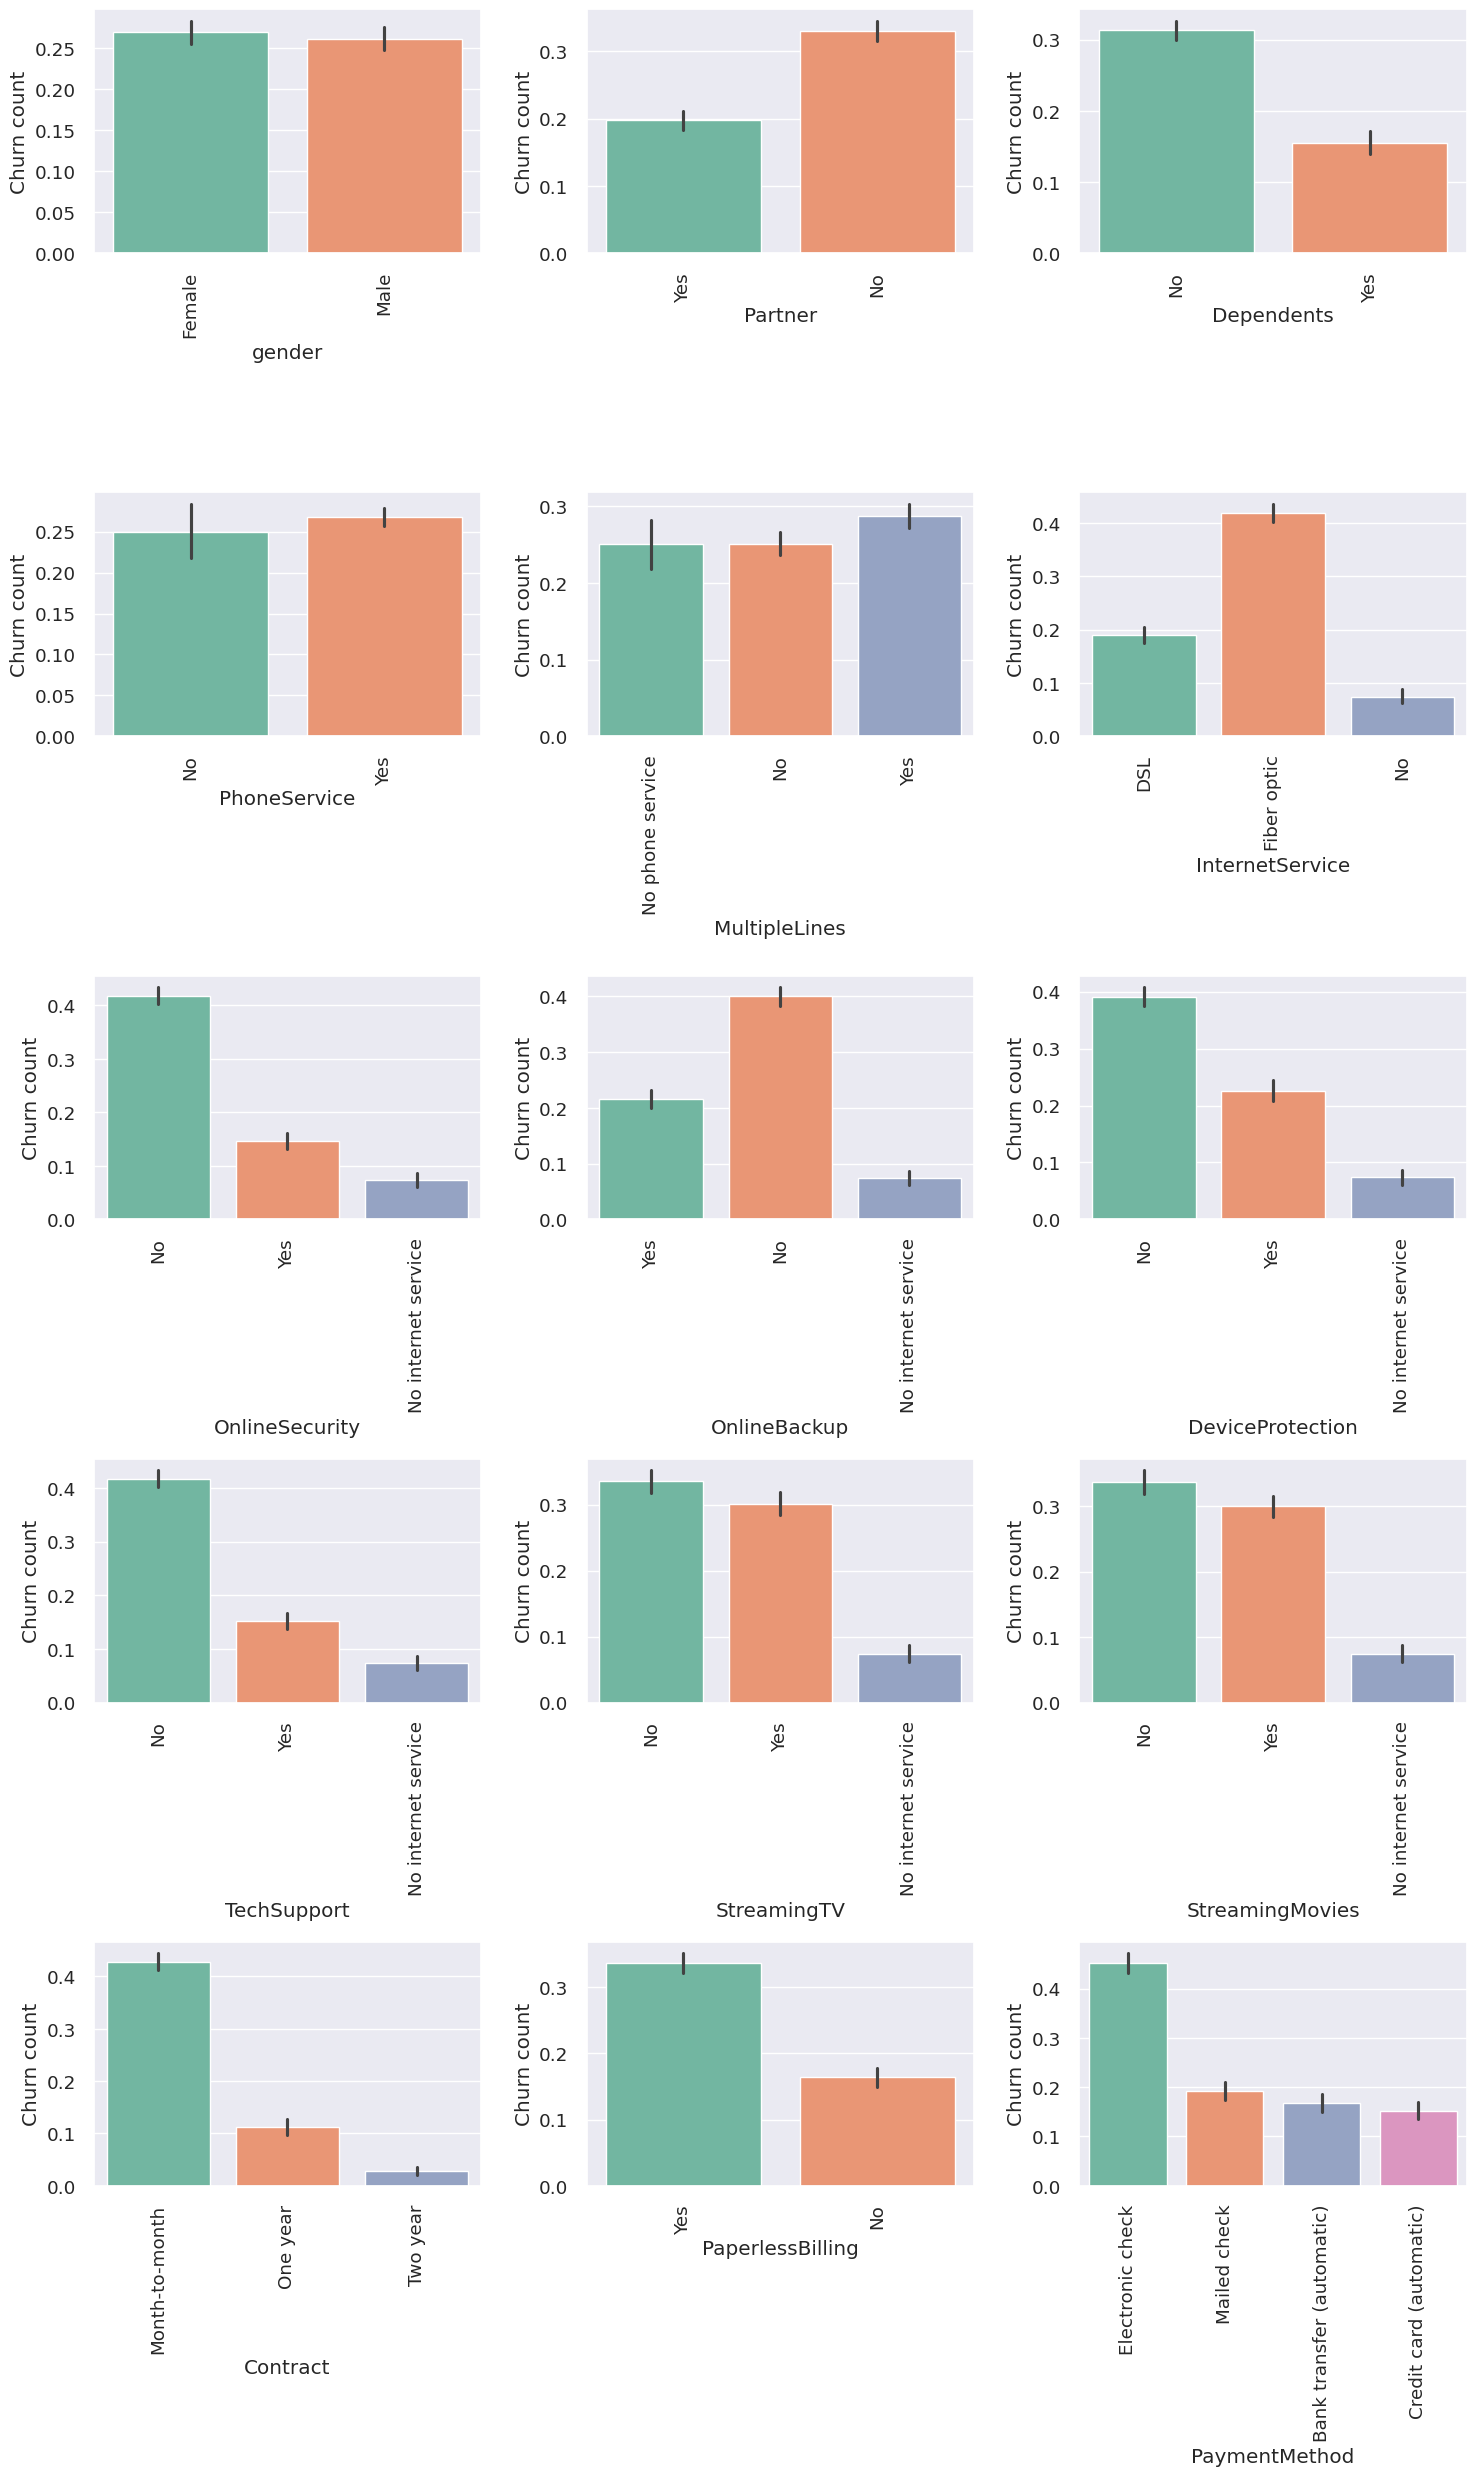

In [37]:
import math


# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)

# Calculate the number of rows and columns for the grid based on the number of categorical features
n_features = len(categorical_features)
n_cols = 3  # You can set this to the number of columns you want
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    g = sns.barplot(x=column, y='Churn', data=df, palette='Set2')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn count')
    plt.xlabel(f'{column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Question 1 Answer / Part 2 :**

Here we used bar plots to investiagte the correlation between churn and the categorical attributes and its values

*   Gender: Female customers tend to have a slightly higher churn rate than male customers.

*   Partners: The customers who have no partners has a higher churn rate than customers who has partners.

*   Dependents: The customers who have no dependents has a higher churn rate than customers who has partners.

*   Phone Service:The customers who have phone service has a higher churn rate than customers who has no phone service.

*   Multiple Lines:Customers who has more than one line are more likely to churn than the customers who have one line or customers who no phone service.

*   Internet Service:Customers who have fiber optic as interent service provider have a higher churn rate than customers who have DSL or have no interent service.And in the second place comes customer who have DSL as they have higher churn rate than customer who have no internet service provider.

*   Online Security: Customers who have no online security tend to churn more than customers who have online security and no internet service.And the cutomers who have online security tend to churn more than customers have no internet service.

*   Online Backup: Customers who have no online backup tend to churn more than customers who have online Backup and no internet service.And the cutomers who have online backup tend to churn more than customers have no internet service.

*   Device Protection: Customers who have no device protection tend to churn more than customers who have Device Protection and no internet service.And the cutomers who have device protection tend to churn more than customers have no internet service.

*   TechSupport: Customers who have no Tech Support tend to churn more than customers who have Tech Support and no internet service.And the cutomers who have Tech Support tend to churn more than customers have no internet service.

*   Streaming TV: Customers who have no Streaming TV tend to churn more than customers who have Streaming TV and no internet service.And the cutomers who have Streaming TV tend to churn more than customers have no internet service.

*   Streaming movies:Customers who have no Streaming movies tend to churn more than customers who have Streaming movies and no internet service.And the cutomers who have Streaming movies tend to churn more than customers have no internet service.

*   Contract: The customers with contract terms month-to-month are more likely to churn than one-year and two-year contract term customers.

*   Paperless Billing:Customers who have paperless billing are more likely to churn tha customers who have no paperless billing.

*   Payment Method:The customer with electronic payment methods have a higher churn ratethan cutomers who use mailed check , bank transfer or credit card.While there is a slight difference between the churn levels of the other payment methods but in the second place comes the mailed check then bank transfer(automatic) and lastly the credit card(automatic).




















**Answer for Q1**:
I explained each seperately above uder its graph


**Q2: Which payment method has the highest churn rate?**

**Visualization**

<ipython-input-38-6239721125e2>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 1.0, ' Churn by Payment Method')

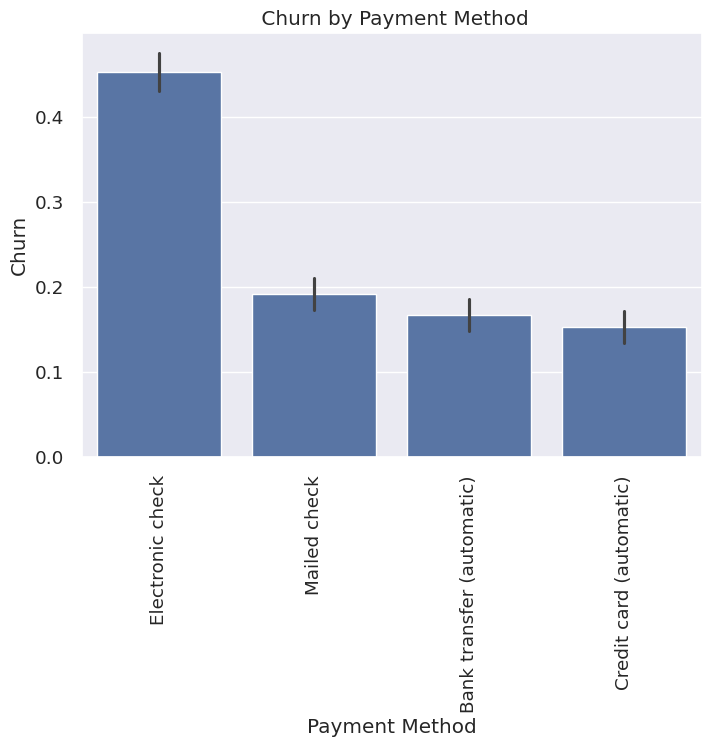

In [38]:
g = sns.barplot(x='PaymentMethod', y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn')
plt.xlabel('Payment Method')
plt.title(' Churn by Payment Method')

**Answer for Q2**:
The electronic check payment method has the highest churn rate among all the other payment methods.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

<ipython-input-39-8fa8a41d467b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette=['skyblue', 'salmon'])


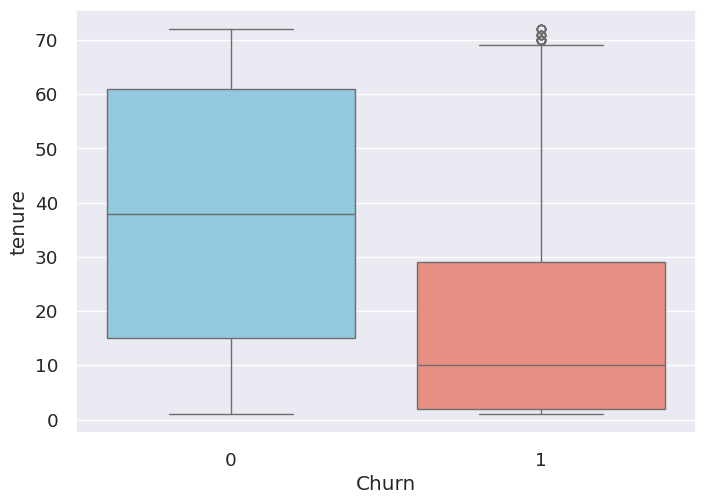

<Figure size 1200x600 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for churned customers
sns.boxplot(data=df, x='Churn', y='tenure', palette=['skyblue', 'salmon'])

# Plot the distribution of tenure for churned customers
plt.figure(figsize=(12, 6))

plt.show()


**Answer for Q3**:

We represented the churn distribution over the months using a box plot.
After 1 or 2 months , 25 % (Q1) of those who churn , churn in this period.About 50% of the churned customers (Q2 which is the median) churn after 10 months.After almost 29 months ,75%  (Q3)of the customers who churn churn.

## Data Preparation for Modelling

In [40]:
#Here we dropped total charges as we mentioned above the justification
df.drop('TotalCharges', axis=1, inplace=True)


In [41]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [42]:
#Here we craeted a copy of our origional data frame so we can start working on the model but without affecting or changing anything on the original data frame
df_encoded = df.copy()

In [43]:
#We have already made changes to contract attribute above when we changed it to ordinal attribute
#Now we need to encode it into numerical values to fit into the model
#each value will be mapped to a unique integer
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [44]:
#We have created a categorical features column that has a copy of the categorical columns except churn
#Now we will remove contract attribute now as it is no longer categorical since we have already encoded
categorical_features.remove('Contract')

In [45]:
df_encoded.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
0               No          No          No              No         0   
1              Yes          No          No              No         1   
2               No          No          No              No         0   
3              Yes         Yes          No              No         1   
4               No          No          No              No         0   

  PaperlessBilling              PaymentMethod  MonthlyCharges  Churn  
0              Yes           Electronic check           29.85      0  
1               No               Mailed check           56.95      0  
2              Yes               Mailed check           53.85      1  
3               No  Bank transfer (automatic)           42.30      0  
4              Yes           Electronic check           70.70      1

In [46]:
#Here we encoded the rest of the categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   MonthlyCharges                           7032 non-null   float64
 4   Churn                                    7032 non-null   int8   
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 no

In [47]:
#After encoding the binary values were split to two attributes which is redundant
#Accordingly, we removed one of those columns for each binary value
df_encoded.drop(['PaperlessBilling_No','gender_Female','Dependents_No','Partner_No','PhoneService_No']
                , axis='columns', inplace=True)
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_El

In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   MonthlyCharges                           7032 non-null   float64
 4   Churn                                    7032 non-null   int8   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_Yes                              7032 non-null   bool   
 7   Dependents_Yes                           7032 non-null   bool   
 8   PhoneService_Yes                         7032 non-null   bool   
 9   MultipleLines_No                         7032 non-null   bool   
 10  MultipleLines_No phone service           7032 no

In [49]:
#Here we are will split the data for model preparation
#We split the data to two parts the training 80% and the testing 20%
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [50]:
#We will use a descision tree to predict  churn
#Tree training
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [51]:
#We used this code to visualize the tree and to view its nodes, root, leaf
#So that we we would be able to extract the descison tree rules and the splitting conditions
#This code works on google colab
# First, install the graphviz package
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
graph

# Alternatively, to export the graph to a file, uncomment the line below:
#graph.render('Churn')


In [52]:
#We used this code to visualize the tree and to view its nodes, root, leaf
#So that we we would be able to extract the descison tree rules and the splitting conditions
#This code works on google colab
# First, install the graphviz package
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
#graph

# Alternatively, to export the graph to a file, uncomment the line below:
graph.render('Churn')


'Churn.pdf'

In [53]:
#We used this code to download the tree as pdf
from google.colab import files
files.download('Churn.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-- Decision tree is a technique used in predicting data. It is rule based where we split on a certain attributes each time until we recah the predicted class label.It has a a root node , non leaf and leaf nodes where it splits on differenr conditions to classify the data and reach the output.
If the node's condition is true then we go to the left and if it is fasle we will go the right of the tree and we keep moving from a node to another until we reach the leafs where the gini(information gain) is equal to 0.

-- Here we traced a whole branch started from the root to the leaf and w extracted its rules below:



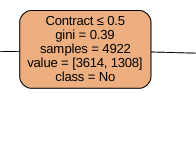



This is the root node in our descision tree.
It started with splitting on the contract attribute.
The data was splitted to customers whose contract terms is less than or equal to month-to-month contract.So if the condition is true so we wil go to the left and if it is false we wil go to the right where those will be the customers that there contract terms is more than one month.


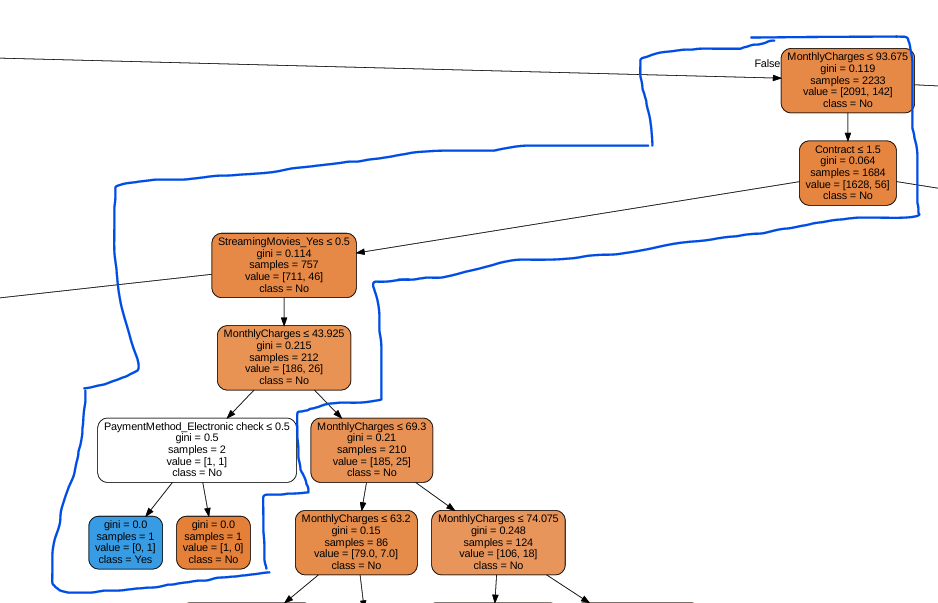

General Notes on the nodes:

-- Each node has five representation

-- The first value is the attribute/condition we are splitting on

-- The next four are repeated in every node but with different values which are:

1- gini which shows the information gain and we keep splitting until we reach gini of value equal to zero (leaf node)

2- sample is the number of customers that reach this node based on the splitting

3- values it shows the number of customers in each class we have which is in our case the yes and the No class.

4- Class where we find the predicted class for the node which based on the number of values in each class

Rule Extraction from the tree:

-- We chose to go to the right of the root node which is false meaning we are now with the custoners whose contract terms is greater than month-to-month and here is the path we have chosen.

-- The next node splits on the monthly charges attribute where it classified the customers based on their monthly charges.It splitted on the 93.675$/m so for the customers whose monthly salary is higher we will go to the right of this node and if it the condition is true we will go to the left.

-- We chose to go to the left where customers have salaries less than 93.675

-- The next node splitted on "Streaming_Movies_Yes" where the condition is "Streaming_Movies_Yes<0.5"

-- Then we moved to the right where the condition is false which is > 0.5 indicating that customer has streaming movies as it is approaching 1, the next node splits on monthly charges again where the value is less than or equal 43.925$/m.

-- We went down to the left where the conditon is satisfied where customers monthly charges is <= 43.92.The next node splits on the payment method where it specifically splits on one of its values which is the electronic check <= 0.5 .

-- Then moving to the leaf node, when we go to the left where the above condition is true which means the customer does not pay through electronic check as (<=0.5) means we are near the 0 which is a "no".

-- then we will find out in the leaf node that the customer will churn as the class output is a "yes"


Overall Conclusion:

We can summarize this as follows:

If the customer's contract rate is one year contract , monthly charges <= 43.25$ (because we splitted twice on monthly charge) , has streaming movies, customer does not pay using eloctronic cards then customer most likely will churn.

## Evaluation

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Since there is a class imbalance in our data so following the traditional  evaluation techniques like calculating the accuracy or errors will not be efficient.

So we will evaluate the descision tree using the confusuin matrix to look for the recall and the precision


•	The confusion matrix is one of the classification tools that is used to evaluate the accuracy of the model by checking whether the predicted label is similar to the actual or not. The results are classified to four categories which are the True Positives (TP) where the actual is positive result while the output is positive too, True Negatives (TN) where the actual is negative and the predicted value is also negative, the False Positives (FP) where the actual is negative and the predicted is positive and lastly the False Negatives (FN) where the actual is positive but the predicted value was negative.

• Applying this to our model, our TP class is the customers who will churn (yes)






In [55]:
#Here we displayed the model evalauation scores
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.84%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    0.99      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   7 1301]]

Test Result:
Accuracy Score: 71.94%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.47      0.72       0.65          0.73
recall       0.79   0.52      0.72       0.66          0.72
f1-score     0.81   0.50      0.72       0.65          0.72
support   1549.00 561.00      0.72    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1224  325]
 [ 

-- The testing accuracy is 71.94% , we can say that this is accepted but the model needs improvement.However, as explained above since we have a class imbalance we can't just rely on accuracy as accuracy focuses on the model's general performance not on each class performance. So we will rely on the recall , precision and f1-score.


-- Precsion basically tells us how many of the of the positive predictions the model has predicted is actually correct, so mainly cares for the FP as we want to minimize them .In order to calculate it we divide the TP over TP plus the FP. High precision means the model accuarately predicts the positive class.

-- Recall tells us how many of the negative predictions the model predict is incorrect meaning when the model predicts negative output but it should be true so here our concern is on FN as we want to minimize it. In order to calculate it we divide the TP over FP plus TP.

-- F1-score is the harmonic mean of precision and recall as it combines both of them in order to balance between both of them.

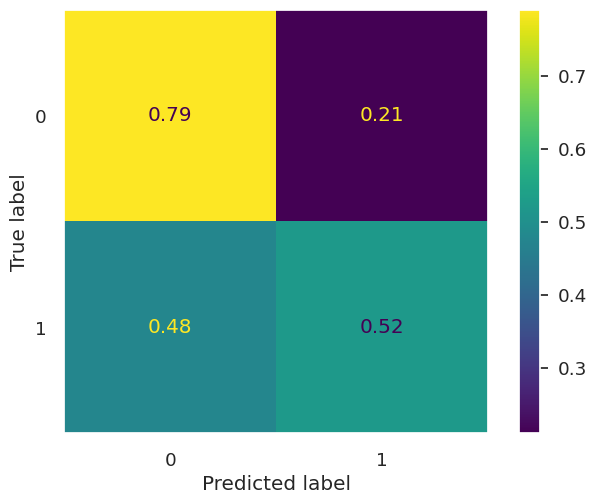

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

This confusion matrix shows us that:
Since our TP class is the churn where the (yes) is represenetd by 1:

-- the tree was able to predict 52% of the customer who churned (TP)

-- the tree predicted that 21% of the custonmer who did not churn churned (FP)

--the tree falsely predicted that 48% of the customers will not churn while they actually churned (FN)

-- the tree acurately predicted that 79% of the customers did not churn (TN)

In [57]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.47495961227786754
Recall:  0.5240641711229946
F1_score:  0.49830508474576274


-- The Precision for the positive class (1) yes where customer churned is
 47.96% meaning that 47.96% of the customers that were predicted to churn actually churned while the rest were false positives(52.04 % ofcustomers who did not churn but were predicted to churn). This percenatge is a really low one as meaning that it has a high false positive rate

-- The recall is 52.4% meaning that 52% of the customeers who actually churned were predicted to churn while the rest were false negatives (47.6 % predicted to not churn while they actually churned).This is considered very low percenatge as there is alot of FN which makes the model miss alot ot positives.

-- the F1-score is 49.8% which is considered a very low percenatge, this is  due to the low percentage of the precision and the recall which makes the model  provides inaccurate predictions and weak model performance

In [58]:
print('\nMetrics for Negative Class:')
print('Precision: ', precision_score(y_test, pred, pos_label=0))
print('=======================================')
print('Recall: ', recall_score(y_test, pred, pos_label=0))
print('=======================================')
print('F1_score: ', f1_score(y_test, pred, pos_label=0))


Metrics for Negative Class:
Precision:  0.8209255533199196
Recall:  0.790187217559716
F1_score:  0.8052631578947368


-- The Precision for the negative class (0) No where customer did not churn is 82.09% meaning that 82.09%  of the customers that were predicted not to churn actually did not churn while the rest were false positives("customers who did not churn but were predicted to churn). This percenatge is a really high one as this means that the model accurately predicts most of the customers who do not churn.

-- The recall is 79% meaning that 79% of the custometers who actually did not  churn were correctly predicted by the model that they will not churn while the rest were false negatives ( 21% were predicted to not churn while they actually churned).This is considered high percenatge as there is few FN which makes the model more accurate meaning the model is able to identify most of the actual non-churners.

-- the F1-score is 80% which is considered a very high percenatge which is due to the high values of the precision and recall too showing a high balance between them.This means the model would accurately predict the non churned customers most of the time that we can rely on it.

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)

#I incread the number of fold since we have 7032 rows
skf = StratifiedKFold(n_splits=7)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.50415512, 0.46831956, 0.45263158, 0.51908397, 0.48167539,
       0.51813472, 0.54545455])

In [60]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.50 (+/- 0.06)


Stratified K-fold is type of cross validation.K-Fold Cross Validation is one of the model evaluation techniques where the data is split to “K” subsets/folds, the model is trained on “K-1” and the testing is done on the remaining subset. This is repeated “K” times where each time the testing subset changes.

Applying this to our project, we split the data set into 7 folds where every time a fold was tested based on the other 6 trained folds. We have chosen to test using this technique as it more reliable than a single train-test split, we will test the model on different parts of the data in order to make sure it is accurate.

It is accuracy is 50% which is still of a low percenatage

**Conclusion**

Decision tree results with this data is not really accuracte and has really low accuracy, recall and precsion.It is not recommeneded to use this data mining technique for this data and we can consider other more effective techniques.

## Bonus (Optional)

**Random Forest**




In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [63]:
# Evaluating Decision Tree model
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 99.84%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    0.99      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   7 1301]]

Test Result:
Accuracy Score: 71.94%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.47      0.72       0.65          0.73
recall       0.79   0.52      0.72       0.66          0.72
f1-score     0.81   0.50      0.72       0.65          0.72
support   1549.00 561.00      0.72    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1224  325]
 [ 

In [64]:
# Evaluating Random Forest model
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 99.82%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3610    4]
 [   5 1303]]

Test Result:
Accuracy Score: 77.54%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.60      0.78       0.71          0.76
recall       0.88   0.48      0.78       0.68          0.78
f1-score     0.85   0.53      0.78       0.69          0.77
support   1549.00 561.00      0.78    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1367  182]
 [ 

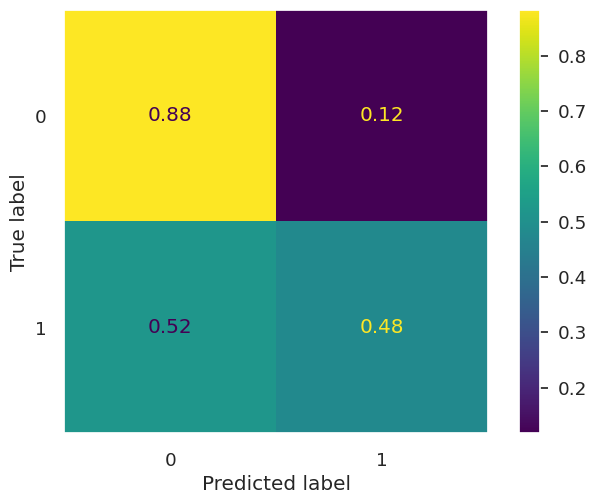

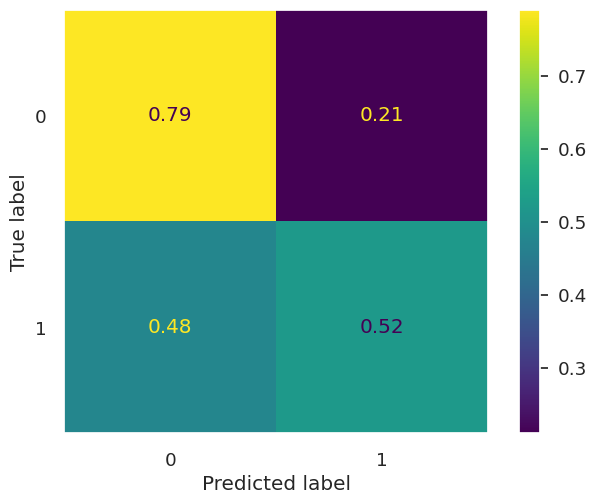

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_clf.predict(X_test), labels=rf_clf.classes_, normalize='true')
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot()
plt.grid(False)
plt.show()

# Display Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_, normalize='true')
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=tree_clf.classes_)
disp_dt.plot()
plt.grid(False)
plt.show()


In [66]:
from sklearn.metrics import f1_score, precision_score, recall_score

# For Decision Tree
pred_dt = tree_clf.predict(X_test)
print('Decision Tree - Precision: ', precision_score(y_test, pred_dt))
print('Decision Tree - Recall: ', recall_score(y_test, pred_dt))
print('Decision Tree - F1_score: ', f1_score(y_test, pred_dt))

# For Random Forest
pred_rf = rf_clf.predict(X_test)
print('Random Forest - Precision: ', precision_score(y_test, pred_rf))
print('Random Forest - Recall: ', recall_score(y_test, pred_rf))
print('Random Forest - F1_score: ', f1_score(y_test, pred_rf))


Decision Tree - Precision:  0.47495961227786754
Decision Tree - Recall:  0.5240641711229946
Decision Tree - F1_score:  0.49830508474576274
Random Forest - Precision:  0.5964523281596452
Random Forest - Recall:  0.47950089126559714
Random Forest - F1_score:  0.5316205533596838


The random forest results were not significantly higher than that of the descision tree

In [67]:
# Extract one tree from the Random Forest model (e.g., the first tree)
single_tree = rf_clf.estimators_[0]

# Export the selected tree to a dot file using graphviz
dot_data = export_graphviz(single_tree,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph

# Alternatively, to export the graph to a file
# graph.render('Churn_Tree')


**Logistic Regression , K-NN , Gaussian**

In [68]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression( max_iter = 2000 )
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()



In [70]:
# Logistic Regression
%timeit lr_model.fit(X_train, y_train)

# Logistic Regression scoring execution time
%timeit lr_model.score(X_test, y_test)

accuracy = lr_model.score(X_test, y_test)
print(f"\nLogistic Regression Accuracy: {accuracy:.2f}")



lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

f1 = f1_score(y_test, y_pred_lr)

# Print the metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("F1 Score:", f1)


1.28 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
25.4 ms ± 9.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Logistic Regression Accuracy: 0.80
Confusion Matrix:
 [[1384  165]
 [ 265  296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

F1 Score: 0.5792563600782779


-- The logistic regression has 80% general accuracy.

-- For our positive class (1), when considering the confusion matrix metric we found that the precision is of 64% , recall 53% and F1-Score of 58%.

-- For the negative class (0), when considering the confusion matrix metric we found that the precision is of 84% , recall 89% and F1-Score of 87%.

In [71]:
# K-nearst Neighbors Classifier
%timeit knn_model.fit(X_train, y_train)

# K-nearst Neighbors Classifier scoring execution time
%timeit knn_model.score(X_test, y_test)

# K-nearst Neighbors Classifier accuarcy
accuracy = knn_model.score(X_test, y_test)
print(f"\nK-nearst Neighbors Accuracy: {accuracy:.2f}")


knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

f1 = f1_score(y_test, y_pred_knn)

# Print the metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("F1 Score:", f1)




The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
17 ms ± 9.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
586 ms ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

K-nearst Neighbors Accuracy: 0.76
Confusion Matrix:
 [[1304  245]
 [ 268  293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1549
           1       0.54      0.52      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.68      2110
weighted avg       0.75      0.76      0.76      2110

F1 Score: 0.5332120109190173


-- The K-nearst Neighbors Classifier accuracy is 76%

-- For our positive class (1), when considering the confusion matrix metric we found that the precision is of 54% , recall 52% and F1-Score of 53%.

-- For the negative class (0), when considering the confusion matrix metric we found that the precision is of 83% , recall 84% and F1-Score of 84%.

In [72]:
# Gaussian Naive Bayes
%timeit nb_model.fit(X_train, y_train)

# Gaussian Naive Bayes scoring execution time
%timeit nb_model.score(X_test, y_test)

# Gaussian Naive Bayes accuarcy
accuracy = nb_model.score(X_test, y_test)
print(f"\nGaussian Naive Bayes Accuracy: {accuracy:.2f}")


nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)

f1 = f1_score(y_test, y_pred_nb)

# Print the metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("F1 Score:", f1)

27.3 ms ± 5.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 5.01 times longer than the fastest. This could mean that an intermediate result is being cached.
9.38 ms ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Gaussian Naive Bayes Accuracy: 0.67
Confusion Matrix:
 [[923 626]
 [ 73 488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.60      0.73      1549
           1       0.44      0.87      0.58       561

    accuracy                           0.67      2110
   macro avg       0.68      0.73      0.65      2110
weighted avg       0.80      0.67      0.69      2110

F1 Score: 0.5826865671641791


-- The Gaussian Naive Bayes Classifierr accuracy is 67%

-- For our positive class (1), when considering the confusion matrix metric we found that the precision is of 44% , recall 87% and F1-Score of 58%.

-- For the negative class (0), when considering the confusion matrix metric we found that the precision is of 93% , recall 60% and F1-Score of 73%.

To conclude:

-- If we will consider the accuracy as our evlauation metric then the logistic regression model will be chosen as it is higher accuracy than the other models as it is of 80% accuracy.

-- If we are going to consider the confusion matrix and its metrics then:

-- In terms of F1-Score: Logistic regression is of the highest score which is 87%

--If we will consider the positive class as yes then:

  -- For the precison: logistic regression has the highesr precision which is 64% which is higher than the decision tree and the other techniques in the bonus.
  
  -- For the recall: Gaussian Naive Bayes has the highest recall which is 87%


-- Choosing which one of them depends on the business priority if it is a fraud detection task so they may care more for recall so they choose naive bayes as they need to avoid any FN while if another business cares more about churn for example so they would care more about lower FP so they would choose logistic regression for higher precision

-- Finally , the overall performance of the naive bayes and the logistic regression is better than the decision tree performance

--If we will consider the positive class as No then:

  -- For the precison: Gaussian Naive Bayes  has the highesr precision which is 93% which is higher than the decision tree and the other techniques in the bonus.
  
  -- For the recall: Logistic Regression has the highest recall which is 84%

So again it depends on the business need.

In case the business wants to balance between precison and recall then they can choose the logistic regression as it is of the highest F1-Score.




